<a href="https://colab.research.google.com/github/arthurkko/Multiclass-Classification/blob/main/classificacao_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Múltiplas Classes

Este trabalho tem por objetivo desenvolver uma rede neural  usando a plataforma TensorFlow-Keras para realizar uma tarefa de classificação de múltiplas classes.

A tarefa de classificação desse trabalho consiste na identificação de sinais de mão a partir de imagens.

Para isso será usado dois tipos de redes neurais artificiais: as do tipo densa e convolucional.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline

## 1 - Visão geral do problema ##

**Definição do problema**:

O objetivo desse problema é desenvolver uma RNA que recebe como entrada uma imagem de sinais de mão e avalia a probabilidade dos dedos da mão mostrarem um número de 0 a 5 e determina qual o número mais provável entre os seis possíveis.

O banco de dados usado nesse trabalho é SIGNS, que consiste de imagens de sinais de mão criado por Andre Ng (deeplearning.ai). Esse banco de dados pode ser obtido no link: https://github.com/cs230-stanford/cs230-code-examples/tree/master/tensorflow/vision

O banco de dados possui 1080 exemplos de treinamento e 120 exemplos de teste. Cada exemplo consiste de uma imagem colorida associada a um rótulo de 6 classes. A Figura abaixo mostra alguns exemplos dessas imagens.

<img src="https://drive.google.com/uc?export=view&id=1kp9LXIgY0Jau2IQtVPtziiLfmS4p20Oo" style="width:800px;height:300px;">


## 2 - Dados de treinamento

Os dados que iremos utilizar nesse trabalho estão nos arquivos train_signs.h5 e test_signs.h5.

Características dos dados:

- As imagens são coloridas e estão no padrão RGB;
- Cada imagem tem 64 pixels de altura e 64 pixels de largura;
- O valor da intensidade luminosa de cada cor é um número inteiro entre 0 e 255;
- As saídas representam o rótulo do sinal de mão mostrado na imagem, sendo um número inteiro de 0 a 5.



### 2.1 - Leitura dos dados

Para iniciar o trabalho é necessário ler o arquivo de dados. Assim, execute o código da célula abaixo para ler o arquivo de dados.

In [2]:
# Leitura do arquivo de dados
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
print("X_train shape:", X_train_orig.shape, "y_train shape:", Y_train_orig.shape)
print("X_test shape:", X_test_orig.shape, "y_test shape:", Y_test_orig.shape)

X_train shape: (1080, 64, 64, 3) y_train shape: (1, 1080)
X_test shape: (120, 64, 64, 3) y_test shape: (1, 120)


Pela dimensão dos tensores com os dados de treinamento e teste temos:

- 1080 imagens de treinamento com dimensão de 64 por 64 por 3 pixels;
- 120 imagens de teste com dimensão de 64 por 64 por 3 pixels.


Execute a célula a seguir para visualizar um exemplo de uma imagem do banco de dados com a sua classe. Altere o valor da variável 'index' e execute a célula novamente para visualizar mais exemplos diferentes.

y = 5


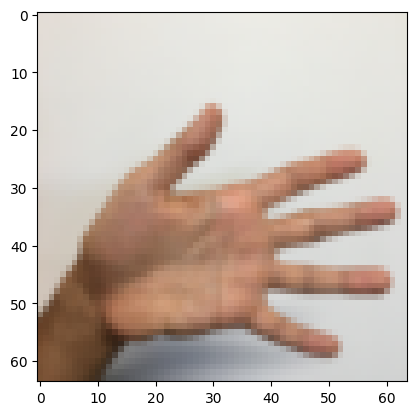

In [3]:
# Exemplo de uma imagem
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

### 2.2 - Processamento dos dados

Para os dados poderem ser usados para o desenvolvimento da RNA devemos primeiramente processá-los.

Para isso devemos realizar as seguintes etapas:

- Dividir os dados de treinamento nos conjuntos de treinamento e validação;
- Os valores dos pixels em uma imagem é um número inteiro que deve ser transformado em número real para ser usado em cálculos;
- Redimensionar as imagens para transfroma-las em um vetor linha;
- Normalizar as imagens de forma que os valores dos pixels fique entre 0 e 1.

### Conjuntos de treinamento e validação

Na célula abaixo crie um código para para dividir o conjunto de treinamento nos conjuntos de treinamento e validação. Use 960 imagens para o conjunto de treinamento e 120 imagens para o conjunto de validação. Não se esqueça de separar também as classes.

Nessa célula também transponha os vetores das saídas para que o primeiro eixo seja o dos exemplos e o segundo eixo o das classes.

In [4]:
# Dados de entrada
X_train = X_train_orig[:960]
X_val = X_train_orig[960:]

# Dados de saída
Y_train = Y_train_orig[:,:960].T
Y_val = Y_train_orig[:,960:].T
Y_test = Y_test_orig.T

print("Dimensão do tensor de dados de entrada de treinamento =", X_train.shape)
print("Dimensão do tensor de dados de entrada de validação =", X_val.shape)
print("Dimensão do tensor de dados de saída de treinamento =", Y_train.shape)
print("Dimensão do tensor de dados de saída de validação =", Y_val.shape)
print("Dimensão do tensor de dados de saída de test =", Y_test.shape)

Dimensão do tensor de dados de entrada de treinamento = (960, 64, 64, 3)
Dimensão do tensor de dados de entrada de validação = (120, 64, 64, 3)
Dimensão do tensor de dados de saída de treinamento = (960, 1)
Dimensão do tensor de dados de saída de validação = (120, 1)
Dimensão do tensor de dados de saída de test = (120, 1)


### Normalização e redimensionameto dos dados de entrada

Na célula abaixo crie um código para normalizar e transformar as imagens em números reais, dividindo por 255. Após essa operação, redimensionar os dados de entrada para ficarem na forma de vetor linha de dimensão `num_px * num_px * 3`.

In [5]:
# Guarda dimensão das imagens
num_px = X_train.shape[1]
image_dim = X_train.shape[1:4]
print("Numero de colunas e linhas das imagens de entrada=", num_px)
print("Dimensão das imagens de entrada=", image_dim)

# Transformação dos dados em números reais
X_train_float = X_train/255
X_val_float =  X_val/255
X_test_float =  X_test_orig/255

# Redimensionamento dos dados de entrada
m_train = X_train_float.shape[0]
X_train_flat = np.reshape(X_train_float, (m_train, num_px*num_px*3))
m_test = X_test_float.shape[0]
X_test_flat = np.reshape(X_test_float, (m_test, num_px*num_px*3))
m_val = X_val_float.shape[0]
X_val_flat = np.reshape(X_val_float, (m_val, num_px*num_px*3))

print('Dimensão dos dados de entrada do conjunto de treinamento: ', X_train_flat.shape)
print('Dimensão dos dados de entrada do conjunto de validação: ', X_test_flat.shape)
print('Dimensão dos dados de entrada do conjunto de teste: ', X_test_flat.shape)

# Para verificar se os resultados estão corretos
print("Primeiros 5 elementos da primeira imagem de treinamento = ", X_train_flat[0,:5])
print("Primeiros 5 elementos da primeira imagem de validação = ", X_val_flat[0,:5])
print("Primeiros 5 elementos da primeira imagem de teste = ", X_test_flat[0,:5])

Numero de colunas e linhas das imagens de entrada= 64
Dimensão das imagens de entrada= (64, 64, 3)
Dimensão dos dados de entrada do conjunto de treinamento:  (960, 12288)
Dimensão dos dados de entrada do conjunto de validação:  (120, 12288)
Dimensão dos dados de entrada do conjunto de teste:  (120, 12288)
Primeiros 5 elementos da primeira imagem de treinamento =  [0.89019608 0.8627451  0.83921569 0.89019608 0.86666667]
Primeiros 5 elementos da primeira imagem de validação =  [0.89803922 0.85882353 0.81176471 0.89411765 0.85882353]
Primeiros 5 elementos da primeira imagem de teste =  [0.90588235 0.87843137 0.84705882 0.90980392 0.87843137]


### Codificação das classes

As classes dos sinais são identificadas por um número inteiro que varia de 0 a 5. Porém, a saída esperada de uma RNA para um problema de classificação de múltiplas classes é um vetor de dimensão igual ao número de classes, que no caso são 6 classes. Cada elemento desse vetor representa a probabilidade da imagem ser um sinal. Assim, devemos transformar as saídas reais do conjunto de dados em um vetor linha de 6 elementos, com todos os elementos iguais a zero a menos do correspondente ao da classe do sinal, que deve ser igual a um.

A função que realiza essa transformação é conhecida na literatura de "one-hot-encoding”, que no Keras é chamada de `to_categorical`. Essa função pertence à classe de utilidades do Keras que deve ser importada antes de ser utilizada.

Implemente na célula abaixo a transformação dos dados de saída usando a função `to_categorical` do keras.

In [6]:
# Importa classe de utilidades do Keras
from tensorflow.keras.utils import to_categorical

# Transformação das classes de números reais para vetores
Y_train_hot = to_categorical(Y_train)
Y_val_hot = to_categorical(Y_val)
Y_test_hot = to_categorical(Y_test)

print('Dimensão dos dados de saída do conjunto de treinamento: ', Y_train_hot.shape)
print('Dimensão dos dados de saída do conjunto de validação: ', Y_val_hot.shape)
print('Dimensão dos dados de saída do conjunto de teste: ', Y_test_hot.shape)

# Para verificar se os resultados estão corretos
print("Primeiras 5 saídas dos exemplos de treinamento = ", Y_train_hot[:5,:])
print("Primeiras 5 saídas dos exemplos de validação = ", Y_val_hot[:5,:])
print("Primeiras 5 saídas dos exemplos de teste = ", Y_test_hot[:5,:])

Dimensão dos dados de saída do conjunto de treinamento:  (960, 6)
Dimensão dos dados de saída do conjunto de validação:  (120, 6)
Dimensão dos dados de saída do conjunto de teste:  (120, 6)
Primeiras 5 saídas dos exemplos de treinamento =  [[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]]
Primeiras 5 saídas dos exemplos de validação =  [[0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]]
Primeiras 5 saídas dos exemplos de teste =  [[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0.]]


Classe numérica:  [3] , Vetor de saída correspondentes:  [0. 0. 0. 1. 0. 0.]


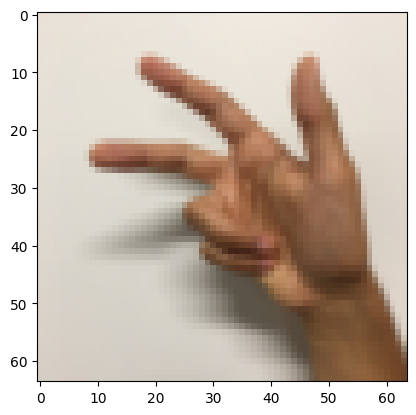

In [7]:
# Exemplo de saída
index = 100
print("Classe numérica: ", Y_train[index], ", Vetor de saída correspondentes: ", Y_train_hot[index])
plt.imshow(X_train_orig[index], cmap='gray', vmin=0, vmax=255)

# RNA Densa

## 3 - Criação e treinamento da RNA

Nesse trabalho você irá usar uma RNA com camadas do tipo densas e com isso poderá verificar a dificuldade de realizar essa tarefa de classificação com esse tipo de RNA.

### Criação e configuração da RNA

Você vai usar uma RNA com 2 camadas intermediárias e uma camada de saída com as seguintes características:

- Primeira camada: número de neurônios n1, função de ativação ReLu;
- Segunda camada: número de neurônios n2, função de ativação ReLu;
- Camada de saída: número de neurônio n3, função de ativação softmax.

Na célula abaixo crie uma função que recebe a dimensão dos dados de entrada e os números de neurônios das 3 camadas e configura a RNA de acordo com as características acima.

In [8]:
# Importa classes do Keras de modelos e camadas
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model(data_shape, n1, n2, n3):
    """
    Essa função configura uma rede neural deep-learnig

    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída

    Retorna: modelo da rede neural
    """
    # Inicialização do gerador de números aleatórios para permitir verificar resultados
    np.random.seed(3)

    model = models.Sequential()

    # Adicione as camadas em seu modelo de RNA
    model.add(layers.Dense(n1, activation='relu', input_shape=data_shape))
    model.add(layers.Dense(n2, activation='relu'))
    model.add(layers.Dense(n3, activation='softmax'))

    return model

Defina os números de neurônios das camadas intermediárias e de saída e crie a RNA usando a função `build_model` criada na célula anterior. Utilize n1 = 64, n2 = 32, n3 = 6. Após criar a RNA utilize o método summary para visualizar a sua rede.

In [9]:
# Dimensão dos dados de entrada
data_shape = (12288,)

# Definição dos números de neurônios das camadas
n1 = 64
n2= 32
n3 = 6

# Cria rede neural deep learning e apresenta sua configuração
rna = build_model(data_shape, n1, n2, n3)
rna.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                786496    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 788774 (3.01 MB)
Trainable params: 788774 (3.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização do gradiente descendente com momento. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- taxa de aprendizado = 0,001;
- constante beta = 0,9;
- decay = 0;
- nesterov = True
- batch_size = 120;
- número de épocas = 600.

**Importante:** Escolha o parâmetro verbose=0 no método `fit` para evitar de imprimir os resultados das 600 épocas de treinamento.

In [10]:
# importa do keras a classe dos otimizadores
from tensorflow.keras import optimizers

# Configuração do otimizador
mom = optimizers.SGD(learning_rate=0.001, nesterov=True, momentum=0.9)
rna.compile(loss='categorical_crossentropy', optimizer=mom, metrics=['acc'])

# Treinamento da RNA
history = rna.fit(X_train_flat, Y_train_hot, epochs=600, batch_size=120, validation_data=(X_val_flat, Y_val_hot), verbose=0)

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

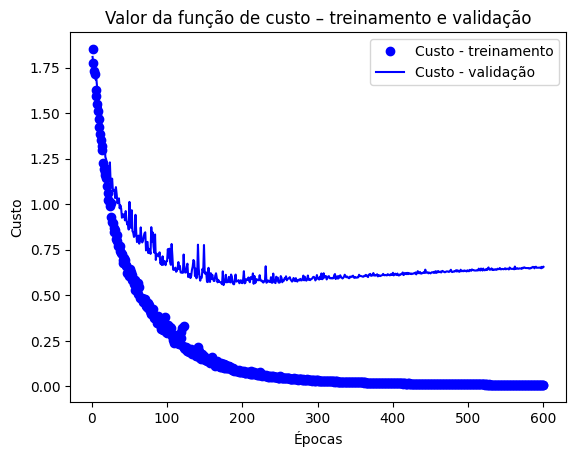

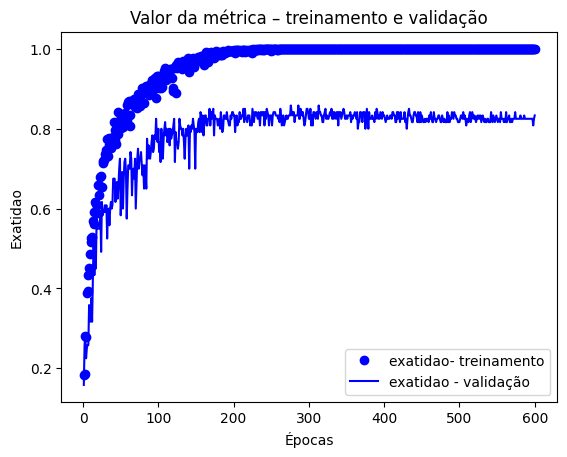

In [11]:
# Salva treinamento na variável history para visualização
history_dict = history.history

# Salva custos, métricas e epocas em vetores
custo = history_dict['loss']
acc = history_dict['acc']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_acc']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'bo', label='Custo - treinamento')
plt.plot(epocas, val_custo, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'bo', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O valor do custo para os dados de treinamento diminui constantemente ao longo do treinamento e estabiliza em um valor de cerca de 0,01.
- O valor do custo para os dados de validação diminui até por volta da época 200 e depois aumenta levemente e estabiliza em um valor de cerca de 0,6, o que representa um resultado ruim.
- A exatidão obtida para os dados de treinamento é de 100%, enquanto que para os dados de validação é de cerca de 85%.

O grafico da função de custo durante o treinamento e os valores obtidos para a função de custo e para a métrica no final do treinamento mostram claramente que está ocorrendo overfitting dos dados de treinamento.

### Cálculo do custo e métrica

Modifique a célula abaixo para calcular o custo e a exatidão para os dados de treinamento, validação e teste.

In [12]:
# Usando o método evaluate calcule o custo e a exatidão
custo_e_metricas_train = rna.evaluate(X_train_flat, Y_train_hot)
custo_e_metricas_val = rna.evaluate(X_val_flat, Y_val_hot)
custo_e_metricas_test = rna.evaluate(X_test_flat, Y_test_hot)

print('Dados de treinamento: ', custo_e_metricas_train)
print('Dados de validação: ', custo_e_metricas_val)
print('Dados de teste: ', custo_e_metricas_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.4071 - acc: 0.8833
Dados de treinamento:  [0.007833431474864483, 1.0]
Dados de validação:  [0.656158447265625, 0.8333333134651184]
Dados de teste:  [0.4071051776409149, 0.8833333253860474]


## 4 - Teste da RNA

### Verificação dos resultados

Na célula abaixo calcule a previsões da sua RNA para as imagens dos dados de teste e depois verifique se algumas dessas previsões estão corretas.

Note que a previsão da RNA é um vetor de 6 elementos com as probabilidades da imagem mostrar os seis sinais. Para detereminar a classe prevista deve-se transformar esse vetor em um número inteiro de 0 a 5, que representa o sinal sendo mostrado. Para fazer essa transformação use a função numpy `argmax(Y_test, axis=?)`, onde Y_test é o tensor com as saídas previstas pela RNA. Em qual eixo você deve calcular o índice da maior probabilidade?

Troque a variável index (variando entre 0 e 119) para verificar se a sua RNA consegue classificar corretamente o sinal de mão mostrado nas imagens.

4/4 [==============================] - 0s 4ms/step
y = 2


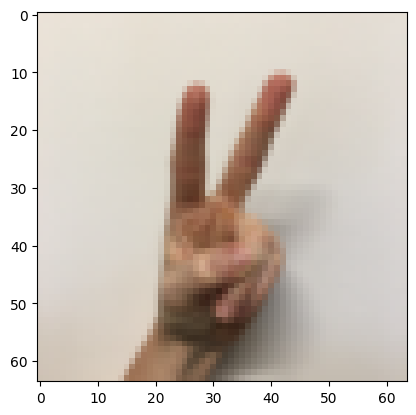

In [13]:
# Calculo das previsões da RNA
Y_test = rna.predict(X_test_flat)

# Cálculo das classes previstas
classe = np.argmax(Y_test, axis=1)

# Exemplo de uma imagem dos dados de teste
index = 52
plt.imshow(X_test_orig[index])
print ("y = " + str(np.squeeze(classe[index])))

### Visualização dos resultados

Na célula abaixo crie um código para fazer um gráfico com as classes reais e as previstas pela sua RNA para todos os exemplos do connjunto de teste.

Dimensão vetor classes reais=  (1, 120)
Dimensão vetor classes previstas=  (120,)


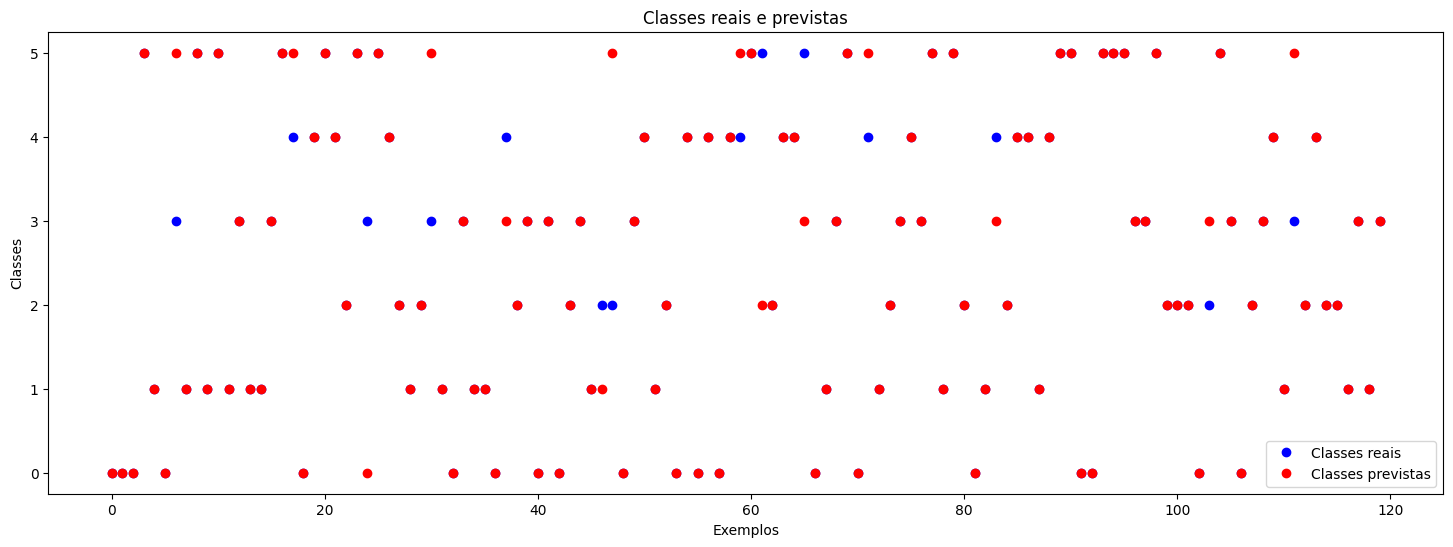

In [14]:
# Resultado gráfico
# Verifique dimensoes dos vetores de classes reais e previstas
print('Dimensão vetor classes reais= ', Y_test_orig.shape)
print('Dimensão vetor classes previstas= ', classe.shape)

# Fazer o gráfico das classes reais e previstas
plt.figure(figsize=(18, 6))
plt.plot(Y_test_orig.T, 'bo', label='Classes reais')
plt.plot(classe, 'ro', label="Classes previstas")
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show()


## 8 - Conclusão

Uma das conclusões desse trabalho é que obter uma RNA que apresenta um desempenho satisfatório para os dados de teste nem sempre é uma tarefa fácil.

Outra conclusão é que essa RNA com camadas densas possui quase 800.000 parâmetros para realizar uma tarefa simples de classificação de múltiplas classes em imagens. Esse número de parâmetros é muito grande para essa tarefa que não é muito complexa. Se tivéssemos usado imagens com dimensões maiores o número de paâmetros seria muito maior. Além disso, observa-se que quanto maior o número de parâmetros de uma RNA mais difícil é o seu treinamento e maiores são os problemas de overfitting

# RNA Convolucional

## 3 - RNA convolucional

Este trabalho irá usar uma RNA convolucional e, assim, poderá verificar que uma RNA convolucional é mais eficiente para processar imagens do que uma RNA com camadas somente densas, como foi feito anteiormente.

### Criação da RNA

Você vai usar uma RNA com 3 camadas convolucionais, seguidas de camadas "max-pooling", e 3 camadas densas, com as seguintes características:

- Primeira camada convolucional: número de filtros n1, dimensão do filtro 3, "padding valid", "stride" 1, função de ativação ReLu;
- Segunda camada convolucional: número de filtros n2, dimensão do filtro 3, "padding valid", "stride" 1, função de ativação ReLu;
- Terceira camada convolucional: número de filtros n3, dimensão do filtro 3, "padding valid", "stride" 1, função de ativação ReLu;
- Camadas de max-pooling: dimensão da janela 2, "stride" 2;
- Primeira camada densa: número de neurônios n4, função de ativação ReLu;
- Segunda camada densa: número de neurônios n5, função de ativação ReLu;
- Camada de saída: número de neurônio n6, função de ativação softmax.

Ressalta-se que após cada camada convolucional tem uma camada de max-pooling.

Na célula abaixo crie uma função que recebe a dimensão dos dados de entrada e os números de neurônios das camadas e configura a RNA de acordo com as características acima. Não se esqueça de incluir a camada de "flattening" entre a última camada de max-pooling e a primeira camada densa.

In [15]:
# Importa classes do Keras de modelos e camadas
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model_conv(data_shape, n1, n2, n3, n4, n5, n6):
    """
    Essa função configura uma rede neural deep-learnig

    Argumentos:
    data_shape = tuple com dimensões dos dados de entrada da rede
    n1 = número de neurônios da primeira camada
    n2 = número de neurônios da segunda camada
    n3 = número de neurônios da camada de saída

    Retorna: modelo da rede neural
    """
    model = models.Sequential()

    # Adicione as camadas em seu modelo de RNA
    model.add(layers.Conv2D(n1, (3, 3), strides=1, padding='valid', activation='relu', input_shape=data_shape))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(n2, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))
    model.add(layers.Conv2D(n3, (3, 3), strides=1, padding='valid', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(n4, activation='relu'))
    model.add(layers.Dense(n5, activation='relu'))
    model.add(layers.Dense(n6, activation='softmax'))

    return model

Defina os números de neurônios das camadas convolucionais, das camadas densas e da camada de saída e crie a RNA usando a função `build_model` criada na célula anterior. Utilize n1 = 8, n2 = 16, n3 = 32, n4 = 64, n5 = 32, n6 = 6. Após criar a RNA utilize o método summary para visualizar a sua rede.

In [16]:
# Inicializa o gerador de números aleatórios
np.random.seed(13)

# Dimensão dos dados de entrada
data_shape = image_dim

# Definição dos números de neurônios das camadas
n1 = 8
n2 = 16
n3 = 32
n4 = 64
n5 = 32
n6 = 6

# Cria rede neural deep learning e apresenta sua configuração
rna_conv = build_model_conv(data_shape, n1, n2, n3, n4, n5, n6)
rna_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 32)         

### Número de parâmetros da RNA

Calcule o número de parâmetros da sua RNA. Escreva as contas realizadas e os seus resultados a seguir:

- Número de parâmetros da camada convulucional 1 = 3 * 3 * 8 * 3 + 8 = 224
- Número de parâmetros da camada convulucional 2 = 3 * 3 * 16 *8 + 16 = 1168
- Número de parâmetros da camada convulucional 3 = 3 * 3 * 32 * 16 + 32 = 4640
- Número de parâmetros da camada densa 1 = 1152 * 64 + 64 = 73792
- Número de parâmetros da camada densa 2 = 64 * 32 + 32 = 2080
- Número de parâmetros da camada de saída = 32 * 6 + 6 = 198


### Compilação e treinamento da RNA

Agora você vai treinar a sua RNA usando o método de otimização Adams. Assim, na célula abaixo, compile e treine a sua RNA usando os seguinte hiperparâmetros:

- método Adam;
- taxa de aprendizagem = 0.001;
- beta1 = 0.9;
- beta2 = 0.999;
- decay = 0;
- número de épocas = 40.

In [17]:
# importa do keras a classe dos otimizadores
from tensorflow.keras import optimizers

# Configuração do otimizador
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
rna_conv.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['acc'])

# Treinamento da RNA
history = rna_conv.fit(X_train_float, Y_train_hot, epochs=40, verbose=1, validation_data=(X_val_float, Y_val_hot))

Epoch 1/40
30/30 [==============================] - 4s 17ms/step - loss: 1.7863 - acc: 0.1740 - val_loss: 1.7569 - val_acc: 0.3333
Epoch 2/40
30/30 [==============================] - 0s 7ms/step - loss: 1.7311 - acc: 0.2792 - val_loss: 1.6305 - val_acc: 0.3667
Epoch 3/40
30/30 [==============================] - 0s 7ms/step - loss: 1.4620 - acc: 0.4427 - val_loss: 1.2781 - val_acc: 0.4917
Epoch 4/40
30/30 [==============================] - 0s 6ms/step - loss: 1.1593 - acc: 0.5583 - val_loss: 1.0915 - val_acc: 0.5500
Epoch 5/40
30/30 [==============================] - 0s 6ms/step - loss: 0.9087 - acc: 0.6667 - val_loss: 0.9706 - val_acc: 0.6000
Epoch 6/40
30/30 [==============================] - 0s 6ms/step - loss: 0.7767 - acc: 0.7229 - val_loss: 0.8802 - val_acc: 0.6167
Epoch 7/40
30/30 [==============================] - 0s 7ms/step - loss: 0.6629 - acc: 0.7469 - val_loss: 0.7335 - val_acc: 0.7167
Epoch 8/40
30/30 [==============================] - 0s 6ms/step - loss: 0.5653 - acc: 0.8

### Visualização dos resultados

Execute a célula a seguir para fazer os gráficos da função de custo e da métrica para os dados de treinamento e validação.

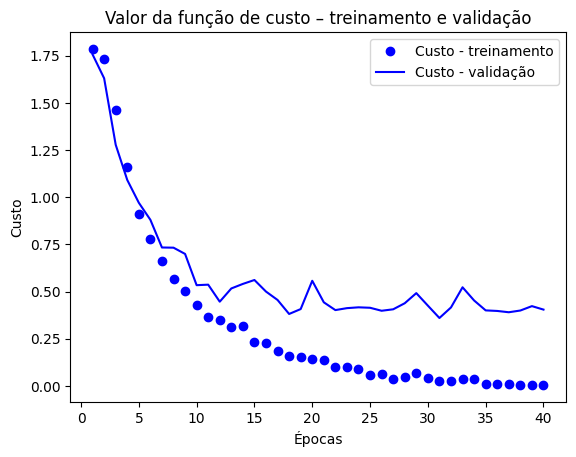

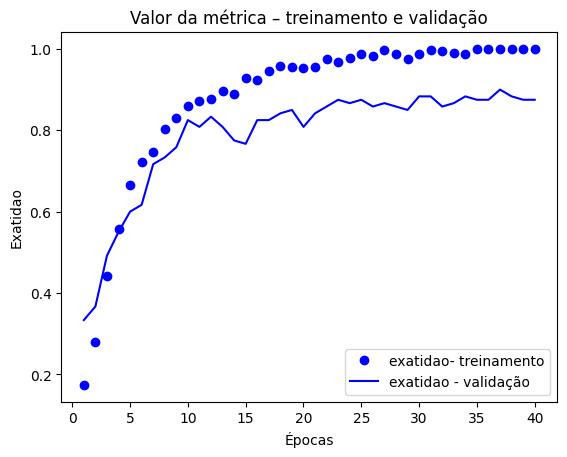

In [18]:
# Salva treinamento na variável history para visualização
history_dict = history.history

# Salva custos, métricas e epocas em vetores
custo = history_dict['loss']
acc = history_dict['acc']
val_custo = history_dict['val_loss']
val_acc = history_dict['val_acc']

# Cria vetor de épocas
epocas = range(1, len(custo) + 1)

# Gráfico dos valores de custo
plt.plot(epocas, custo, 'bo', label='Custo - treinamento')
plt.plot(epocas, val_custo, 'b', label='Custo - validação')
plt.title('Valor da função de custo – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.legend()
plt.show()

# Gráfico dos valores da métrica
plt.plot(epocas, acc, 'bo', label='exatidao- treinamento')
plt.plot(epocas, val_acc, 'b', label='exatidao - validação')
plt.title('Valor da métrica – treinamento e validação')
plt.xlabel('Épocas')
plt.ylabel('Exatidao')
plt.legend()
plt.show()

### Análise dos resultados

Pelos gráficos da função de custo e da métrica você deve observar o seguinte:

- O treinamento é bem rápido, sendo que em somente 40 épocas obtém-se uma extaidão de 100% para os dados de treinamento.
- O valor do custo para os dados de treinamento diminui constantemente ao longo do treinamento e a exatidão aumenta constantemente.
- O valor do custo para os dados de validação diminuem até a época 20 e depois estabiliza.
- A exatidão para os dados de validação aumenta constantemente ao longo do treinamento, mas menos do que para os dados de treinamento.
- A exatidão obtida para os dados de validação é de cerca de 92,5%, o que pode ser considerado um resultado muito bom.

### Avaliação do desempenho da RNA

Na célula abaixo, usando o método `evaluate`, verifique o desempenho da RNA calculando o valor do custo e da métrica para os dados de treinamento, validação e teste.

In [19]:
# Usando o método evaluate calcule o custo e a exatidão
custo_e_metricas_train_conv = rna_conv.evaluate(X_train_float, Y_train_hot)
custo_e_metricas_val_conv = rna_conv.evaluate(X_val_float, Y_val_hot)
custo_e_metricas_test_conv = rna_conv.evaluate(X_test_float, Y_test_hot)

print(custo_e_metricas_train_conv)
print(custo_e_metricas_val_conv)
print(custo_e_metricas_test_conv)

4/4 [==============================] - 0s 6ms/step - loss: 0.2744 - acc: 0.9417
[0.004091908689588308, 1.0]
[0.40419191122055054, 0.875]
[0.2743644714355469, 0.9416666626930237]


### Verificação dos resultados

Na célula abaixo calcule a previsões da sua RNA para as imagens do conjunto de teste e depois verifique se algumas dessas previsões estão corretas.

Note que a previsão da RNA é um vetor de 6 elementos com as probabilidades da imagem mostrar os seis sinais. Para detereminar a classe prevista deve-se transformar esse vetor em um número inteiro de 0 a 5, que representa o sinal sendo mostrado. Para fazer essa transformação use a função numpy `argmax(Y_test, axis=?)`, onde `Y_test` é o tensor com as saídas previstas pela RNA. Em qual eixo você deve calcular o índice da maior probabilidade?

Troque a variável index (variando entre 0 e 119) para verificar se a sua RNA consegue classificar corretamente o sinal de mão mostrado nas imagens.

4/4 [==============================] - 0s 5ms/step
y = 3


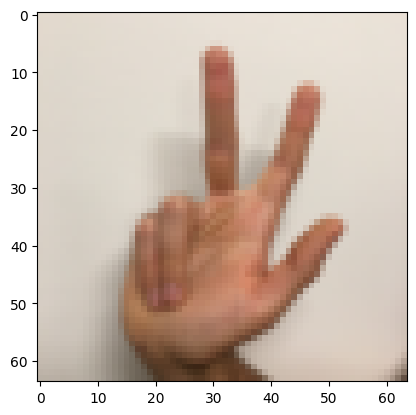

In [20]:
# Calculo das previsões da RNA
Y_test = rna_conv.predict(X_test_float)

# Cálculo das classes previstas
classe = np.argmax(Y_test, axis=1)

# Exemplo de uma imagem dos dados de teste
index = 6
plt.imshow(X_test_orig[index])
print ("y = " + str(np.squeeze(classe[index])))

### Visualização dos resultados

Na célula abaixo crie um código para fazer um gráfico com as classes reais e as previstas pela sua RNA para todos os exemplos do connjunto de teste.

Dimensão vetor classes reais=  (1, 120)
Dimensão vetor classes previstas=  (120,)


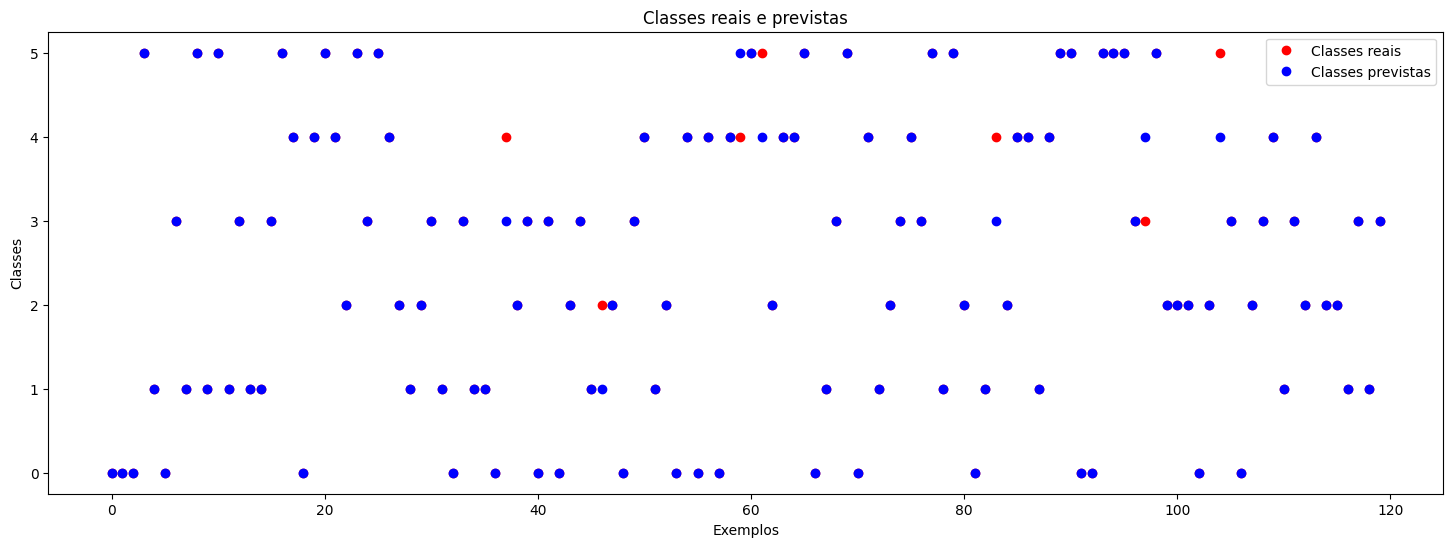

In [21]:
# Resultado gráfico
# Verifique dimensoes dos vetores de classes reais e previstas
print('Dimensão vetor classes reais= ', Y_test_orig.shape)
print('Dimensão vetor classes previstas= ', classe.shape)

# Fazer o gráfico das classes reais e previstas
plt.figure(figsize=(18, 6))
plt.plot(Y_test_orig.T, 'ro', label='Classes reais')
plt.plot(classe, 'bo', label='Classes previstas')
plt.title('Classes reais e previstas')
plt.xlabel('Exemplos')
plt.ylabel('Classes')
plt.legend()
plt.show()

### Criação do modelo para visualização das saídas das camadas convolucionais

Para visualizar as saídas das camadas de uma RNA deve-se criar um modelo que recebe uma imagem como entrada e gera como saída as ativações das camadas que se deseja visualizar. O Keras possui a classe de modelos "Keras Class Model"para fazer isso.

Na célula abaixo crie esse modelo usando dois argumentos: (1) tensores de entrada; (2) lista de tensores de saída, que são as saídas das 6 primeiras camadas da sua RNA (3 camadas convolucionais e 3 camadas max-pooling).

In [22]:
# importa classe de modelos do keras
from tensorflow.keras import models

# Define as saídas como sendo as ativações das seis primeiras camadas da RNA
layer_outputs = [layer.output for layer in rna_conv.layers[:6]]

# Cria e mostra a configuração do modelo que retorna as ativações das camadas, dada uma entrada
rna_ativacoes = models.Model(inputs=rna_conv.input, outputs=layer_outputs)
rna_ativacoes.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 8)         224       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        4640  

### Redimensionamento da imagem para visualização das saídas

Quando esse modelo recebe uma imagem de entrada, ele retorna as ativações das camadas da RNA original escolhidas com saídas. No caso dessa RNA temos uma entrada e seis saídas, uma saída para cada conjunto de ativações das camadas convolucionais e max-pooling.

A imagem usada como entrada dessa nova rna deve ser um tensor de mesmo tamanho que o usado na RNA original. Uma imagem colorida tem 3 eixos (altura, largura, cor) e o tensor de entrada da RNA tem 4 eixos (exemplo, altura, largura, cor), portanto, deve-se incluir um quarto eixo na imagem antes dela ser usada como entrada desse modelo.

Na célula abaixo crie um código que inclui esse novo eixo em uma imagem colorida.

Dimensão do tensor criado com a imagem escolhida =  (1, 64, 64, 3)


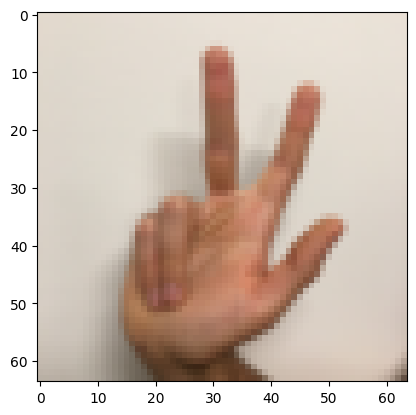

In [23]:
# Escolhe imagem do conjunto de teste e transforma em um tensor com mesmo numero de eixos do tensor de entrada da RNA
index = 6

# Imagem colorida tem 3 eixos (altura, largura, cor), tensor de entrada da RNA tem 4 eixos (exemplo, altura, largura, cor)
imagem = np.expand_dims(X_test_float[index],0)

print("Dimensão do tensor criado com a imagem escolhida = ", imagem.shape)

# Apresenta imagem
plt.imshow(imagem[0])
plt.show()

### Execução da nova RNA

O próximo passo para visualização das saídas das camadas convolucionais é executar o novo modelo em modo de predição. Crie na célula abaixo um código para obter a saída da primeira camada convolucional.

In [24]:
# calcula saídas das camadas convolucionais usando a RNA activation_model com o método predict
activations = rna_ativacoes.predict(imagem)
first_layer_activation = activations[0]

print("Dimensão do tensor de saída da primeira camada convolucional =", first_layer_activation.shape)

1/1 [==============================] - 0s 285ms/step
Dimensão do tensor de saída da primeira camada convolucional = (1, 62, 62, 8)


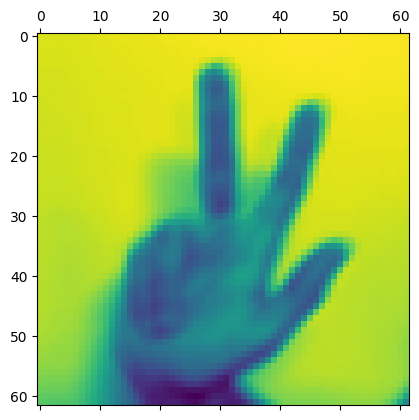

In [25]:
index = 2
plt.matshow(first_layer_activation[0,:,:,index], cmap='viridis')

Execute a célula abaixo para visulizar as saídas de todos os filtros de todas as camadas convolucionais e max-polling para essa imagem de entrada.

<ipython-input-26-e3f096843651>:18: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()


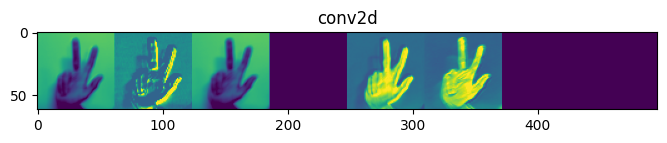

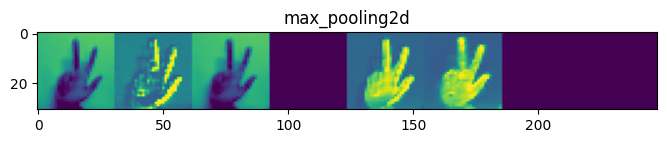

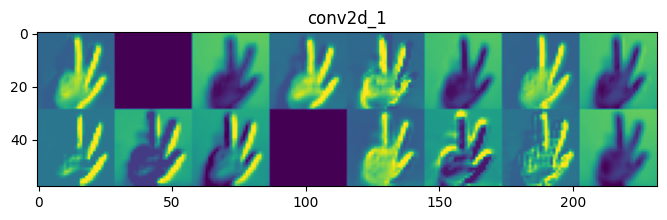

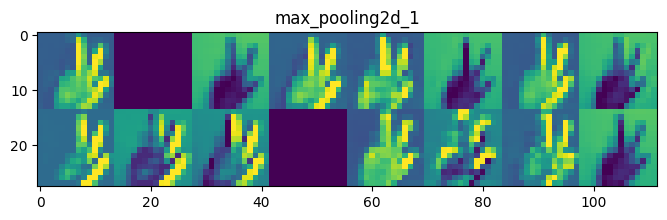

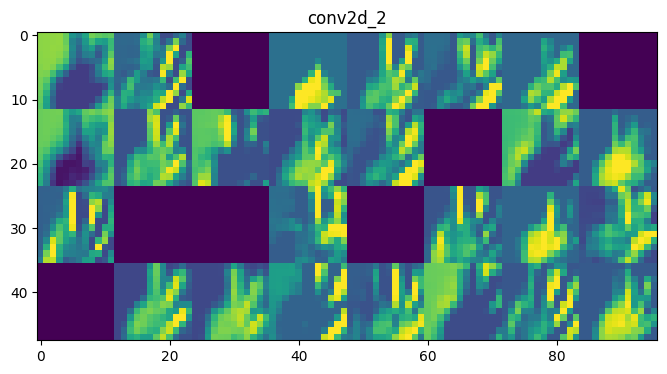

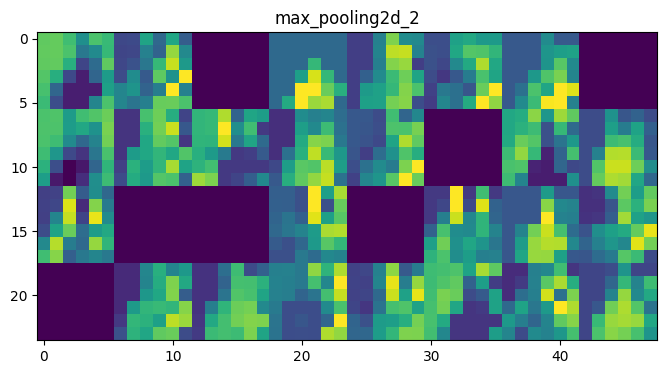

In [26]:
# Visualização de todos os canais das saídas das camadas convolucionais selecionadas
layer_names = []

for layer in rna_conv.layers[:6]:
    layer_names.append(layer.name)

images_per_row = 8

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:,col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Conclusões

A partir desses resultados você pode concluir o seguinte:

- Em geral as primeiras camadas de uma RNA convolucional agem como uma coleção de detectores de vários tipos de bordas.
- Nas primeiras camadas a ativações contém quase toda a informação presente na imagem original.
- Na medida em que avançamos para dentro da rede, as ativações se tornam mais abstratas e com menor significado visual e começam a codificar características de alto nível.
- Características de níveis mais alto contém menos informação visual e mais informações relacionadas com a tarefa a ser realizada.
- A não ativação de filtros para uma determindada imagem aumenta com a profundidade da camada: na 1ª camada praticamente todos os filtros são ativados, mas nas camadas mais profundas menos filtros ficam ativos.
- Quando um filtro não é ativado por uma imagem, significa que o padrão codificado por aquele filtro não está presente naquela imagem.
- Uma característica importante das RNAs convolucionais deep learning é que as características aprendidas pelas suas camadas se tornam cada vez mais abstratas com a profundidade da camada.
- Uma RNA deep learning age efetivamente como um destilador de informação, onde dados brutos são repetidamente transformados de forma que informações irrelevantes são descartadas e informações importantes são ressaltadas e refinadas.

**Importante:**

- Observe que essa RNA possui 82.102 parâmetros, enquanto que a RNA densa usada anteriormente para fazer essa mesma tarefa possuia 788.774 parâmetros.
- Mesmo com um número muito menor de parâmetros a RNA convolucional é capaz de obter resultados melhores do uma RNA densa.
